# PS1-2: Incomplete, Positive-Only Labels

We are considering a set of datapoints $\{(x^i,t^i,y^i)\}$ where $x^i \in \mathbb{R}^n$ and $y^i,t^i \in \{0,1\}$ are binary labels. The $t^i$ are the true labels of the data and the $y^i$ labels are defined by

$$y^i = 1 ~ \text{iff} ~ x^i ~\text{is labeled}$$

We further assume that 

$$ y^i = 1 \implies t^i = 1 $$
$$ p(y^i = 1 \, | \, t^i = 1, x^i) = p(y^i = 1 \,| \,t^i = 1)$$

In english, this means that the set of labeled data points is a subset of the set of positive examples and that
the subset of labeled examples is selected independently of the inputs $x^i$ from among the set of positive examples.


## (A)
#### Show that there is a constant $\alpha$ (independent of $x^i$) so that 

#### $$p(t^i = 1 | x^i) = p(y^i = 1 | x^i)/\alpha$$


### Notation and formulas for conditional distributions

If $X_1, \dots, X_n$ are random variables, $f_{X_1,\dots,X_n}$ is there joint distribution. We will write $f_{X_i|X_j}$ for the conditional distribution of $X_i$ with respect to $X_j$. Then, we have the following formulas which follow directly from the definitions:


$$f_{X|Y} = f_{X|Y,Z}f_Z$$
$$f_{X|Y,Z} = f_{Y|X,Z}\frac{f_{X|Z}}{f_{Y|Z}} $$

Using these, we have 

$$\frac{f_{y^i | x^i}}{f_{t^i|x^i}} = \frac{f_{y^i|x^i,t^i}}{f_{t^i|y^i,x^i}}$$

and if we evaluate at $y^i,t^i = 1$, the denominator is equal to 1 and the numerator is equal to $p(y^i = 1 | t^i = 1)$ by the two assumptions. Hence $\alpha = p(y^i = 1 | t^i = 1)$.


## (B)
#### Suppose that $V$ is a held out validation set. Let $V_+$ be the subset of labeled examples, and assume that 

#### $p(t^i = 1 | x^i) \sim 1$ and that $h$ is a trained model, i.e. $h(x^i) \sim p(y^i = 1 | x^i)$.

#### Show that $h(x^i) \sim \alpha$ for all $x^i \in V_+$.

#### $$\alpha = \frac{p(y^i = 1 | x^i)}{p(t^i = 1 | x^i)} \sim \frac{h(x^i)}{1}$$

## (C)
#### Parts (C),(D),and (E) make use of ds3 train and validation sets.

#### Ideal case: First train a logistic regression classifier using the true 't' labels of the training set and save its predictions.

## (D)
#### Retrain the classifier, but only using the y-labels.

## (E)
#### Using the validation set, estimate the parameter $\alpha$ by averaging over the predictions of all labeled data in the validation set.

#### $$\alpha \sim \frac{1}{|V_+|} \sum_{x^{(i) \in V_+}} h(x^{(i)}) $$

#### This code will save the predictions of each of the models in (C)-(E) to the 'output' folder as well as make three plots of the test dataset which including a decision boundary found by:

- logreg trained with t labels 
- logreg trained with y labels
- logreg trained with y labels and adjusted using the alpha parameter calculated from validation set.

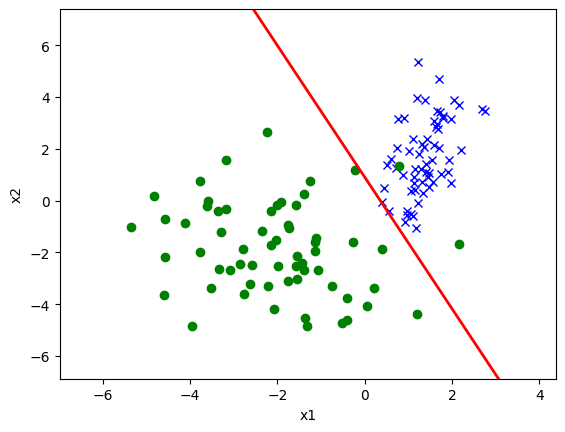

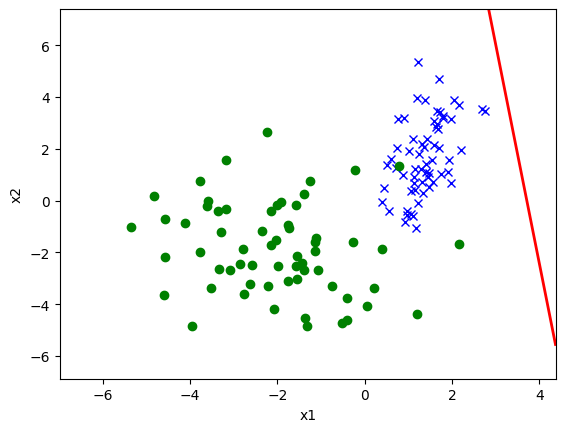

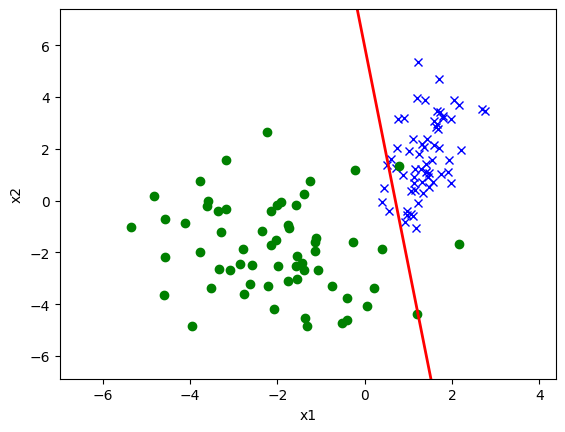

In [6]:
import importlib
import src.p02cde_posonly
importlib.reload(src.p02cde_posonly)
from src.p02cde_posonly import main

path = './data/ds3_X.csv'
main(train_path=path.replace('X','train'),
     valid_path=path.replace('X','valid'),
     test_path=path.replace('X','test'),
     pred_path='./output/p02_preds_X.csv')

#### The decision boundary of the corrected y-trained model was found as follows

Recall we predict $t^i=1$ when $p(t^i=1 | x^i) = \alpha^{-1}h(x^i,\theta) > 0.5$

Therefore the decision boundary is the line 

$$h(x,\theta) = \frac{\alpha}{2}$$

Since $h(x,\theta) = g(x\cdot\theta)$ and $g^{-1}(w) = \log \frac{w}{1-w}$, the decision boundary is

$$ x\cdot\theta = \log \frac{\alpha}{2 - \alpha}$$